In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x, y = make_blobs(n_samples= 300, centers=4, cluster_std=0.8, random_state=42)
df = pd.DataFrame(x, columns=['annual_income', 'spending_score'])


In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

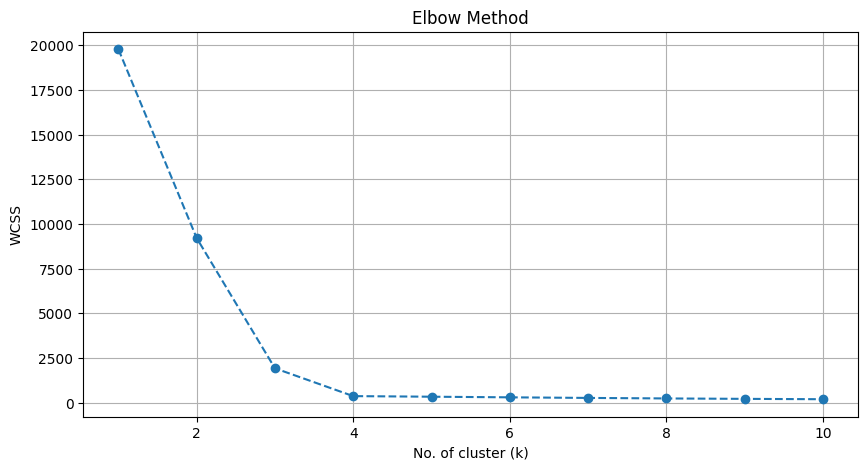

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("No. of cluster (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [6]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

In [7]:
df['cluster'] = kmeans.fit_predict(df[['annual_income', 'spending_score']])

In [8]:
silhouette_avg = silhouette_score(df[['annual_income', 'spending_score']], df['cluster'])
print(f'Silhouette Coefficient: {silhouette_avg:.3f}')

Silhouette Coefficient: 0.834


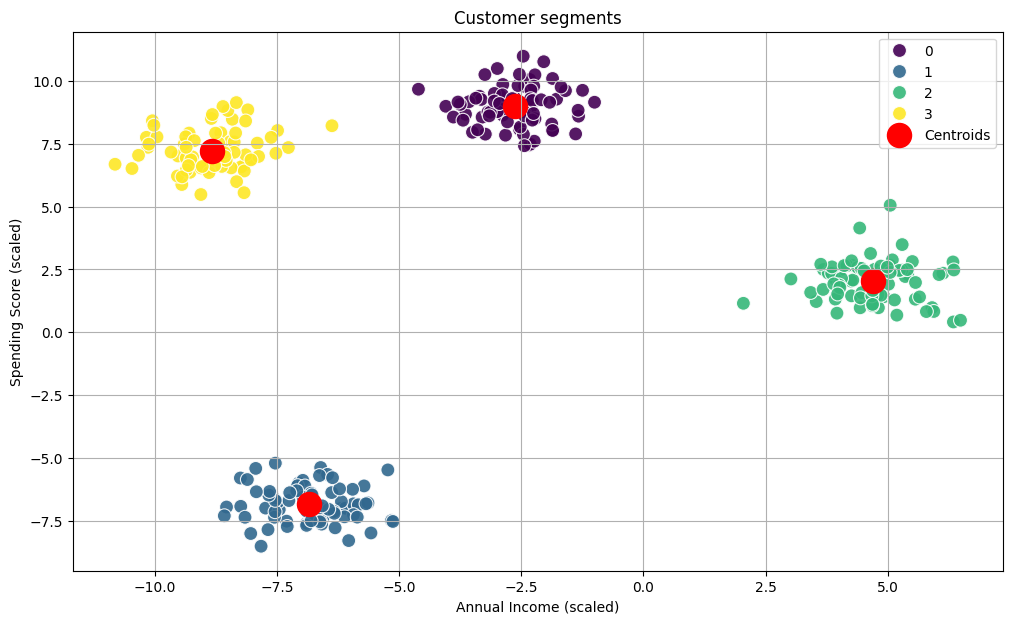

In [9]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster', data=df, palette='viridis', s=100, alpha=0.9, legend='full')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer segments')
plt.xlabel ('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()
